In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
happiness = pd.read_csv('data/2019.csv')
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


Generosity : 자선(관용)

Perceptions of corruption : 부패에 대한 인식

In [3]:
from statsmodels.formula.api import ols

res = ols('Generosity ~ Score', data=happiness).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8905
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.347
Time:                        17:21:09   Log-Likelihood:                 146.38
No. Observations:                 156   AIC:                            -288.8
Df Residuals:                     154   BIC:                            -282.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1498      0.038      3.946      0.000       0.075       0.225
Score          0.0065      0.007      0.944      0.347      -0.007       0.020
==============================================================================
Omnibus:                       19.548   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.198
Skew:                           0.757   Prob(JB):                     3.38e-06
Kurtosis:                       4.259   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

참고 : 회귀분석(https://mindscale.kr/course/basic-stat-python/11/)

In [5]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


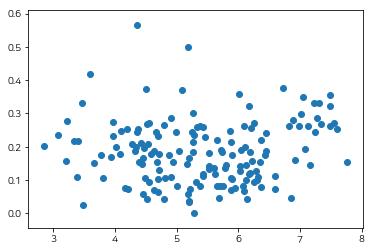

In [14]:
plt.scatter(happiness['Score'], happiness['Generosity'])
plt.show()

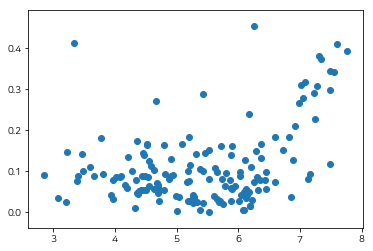

In [13]:
plt.scatter(happiness['Score'], happiness['Perceptions of corruption'])
plt.show()

In [20]:
# ols가 공백을 인식하지 못함
happiness = happiness.rename(columns={'Perceptions of corruption' : 'PoC'})
res = ols('PoC ~ Score', data=happiness).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PoC   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     26.90
Date:                Tue, 11 May 2021   Prob (F-statistic):           6.65e-07
Time:                        17:43:01   Log-Likelihood:                 159.67
No. Observations:                 156   AIC:                            -315.3
Df Residuals:                     154   BIC:                            -309.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0665      0.035     -1.907      0.058      -0.135       0.002
Score          0.0328      0.006      5.186      0.000       0.020       0.045
==============================================================================
Omnibus:                       40.388   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.631
Skew:                           1.249   Prob(JB):                     4.60e-16
Kurtosis:                       5.150   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

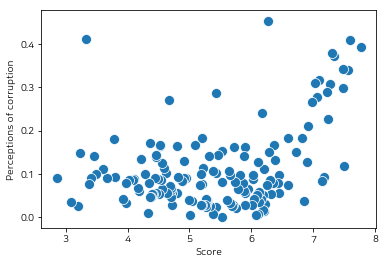

In [12]:
import seaborn as sns

sns.scatterplot(x='Score', 
                y='Perceptions of corruption', 
                s=100, # marker size
                data=happiness)

plt.show()

### 상관계수 검증
#### 상관계수의 값이 통계적으로 유의미한지 검정하는 것
- 귀무가설 : 상관관계가 없다
- 대립가설 : 상관관계가 있다
##### p-value : 통계의 유의성을 대표하는 지표
- 귀무가설에 대한 확률값
- 사회과학분야의 유의수준(알파값 or 임계값) : 0.05 즉, 95%의 신뢰도
- 의생명분야의 유의수준 : 0.01, 99%의 신뢰도
- p-value >= 0.05 : 대립가설 기각, 귀무가설 채택
- p-value < 0.05 : 대립가설 채택, 귀무가설 기각

In [22]:
import scipy.stats as stats

corr, pValue = stats.pearsonr(happiness['Generosity'], happiness['Score'])
print(corr, pValue)

0.07582369490389654 0.3468195386840148


p-value : 0.34 = 상관관계가없다.

In [23]:
corr, pValue = stats.pearsonr(happiness['PoC'], happiness['Score'])
print(corr, pValue)

0.3856130708664788 6.654010938470305e-07


p-value : 6.65 = 상관관계없다.